In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from scipy import stats

In [2]:
# load dataframe
df = pd.read_csv('numerical_cleaned.csv')

In [3]:
# anonymize data
df = df.drop(['Email'], axis=1)

In [29]:
df['PFRP'] = 0.5*(df['Lottery Ticket Price'] + df['Borrowed Money'])

In [11]:
df.columns

Index([u'Sex', u'Year', u'Concentration', u'Concentration_Category',
       u'Hours spent socializing', u'Party Attendance',
       u'Conversation Starting', u'Correcting someone',
       u'Lottery Ticket Price', u'Borrowed Money', u'Reward', u'PFRP'],
      dtype='object')

In [12]:
df['EX'] = df['Hours spent socializing'] + df['Party Attendance'] + df['Conversation Starting']

In [5]:
df

,Sex,Year,Concentration,Concentration_Category,Hours spent socializing,Party Attendance,Conversation Starting,Correcting someone,Lottery Ticket Price,Borrowed Money,Reward,PFRP
0,1,2,Special Concentration,NaN,3,3,4,3,2,3,1,5
1,1,2,Mathematics,SEAS,3,2,3,3,4,2,1,6
2,2,3,Sociology,Social,3,3,4,4,3,2,3,5
3,1,2,Statistics and Computer Science,SEAS,3,5,4,2,2,3,5,5
4,2,3,OEB,SEAS,3,5,4,2,5,2,1,7
5,2,4,Psychology,Social,2,3,3,2,4,4,3,8
6,1,3,Government,Social,4,3,3,3,5,3,1,8
7,2,3,Molecular and Cellular Biology,SEAS,2,5,4,3,4,4,2,8
8,2,2,Molecular and Cellular Biology,SEAS,3,4,3,3,4,2,3,6
9,1,3,Economics,Social,2,3,2,4,4,4,2,8


## Concentration T-Tests

('ah social', 3.75, 3.54, Ttest_indResult(statistic=0.59315218407255721, pvalue=0.56313116995158607))
('ah seas', 3.75, 3.51, Ttest_indResult(statistic=0.69741956426517548, pvalue=0.49914378663260472))
('seas social', 3.51, 3.54, Ttest_indResult(statistic=-0.15255347932134417, pvalue=0.87919292047552877))


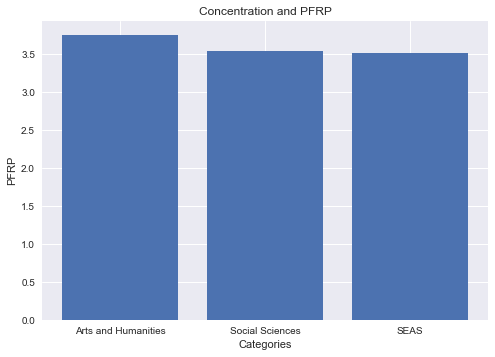

In [30]:
# PFRP
df_con = df.dropna()
seas = df_con.loc[df_con['Concentration_Category'].str.contains('SEAS')]['PFRP']
ah = df_con.loc[df_con['Concentration_Category'].str.contains('AH')]['PFRP']
social = df_con.loc[df_con['Concentration_Category'].str.contains('Social')]['PFRP']

print('ah social', round(ah.mean(), 2), round(social.mean(), 2), stats.ttest_ind(ah, social, equal_var = False))
print('ah seas', round(ah.mean(), 2), round(seas.mean(), 2), stats.ttest_ind(ah, seas, equal_var = False))
print('seas social', round(seas.mean(), 2), round(social.mean(), 2), stats.ttest_ind(seas, social, equal_var = False))
bars = ['Arts and Humanities', 'Social Sciences', 'SEAS']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [ah.mean(), social.mean(), seas.mean()])
plt.title('Concentration and PFRP')
plt.xlabel('Categories')
plt.ylabel('PFRP')
plt.xticks(y_pos, bars)
plt.savefig('concentration_pfrp.png', dpi = 600)
plt.show()

('ah social', 2.4, 2.81, Ttest_indResult(statistic=-0.85841627079476635, pvalue=0.4027164698725747))
('ah seas', 2.4, 2.73, Ttest_indResult(statistic=-0.7007302413848282, pvalue=0.49364063582217632))
('seas social', 2.73, 2.81, Ttest_indResult(statistic=-0.23419128808877424, pvalue=0.81549291538304236))


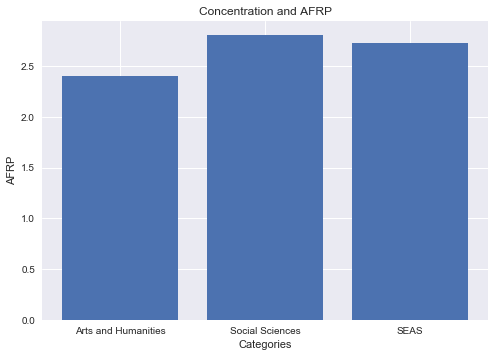

In [9]:
# AFRP i.e. Reward
df_con = df.dropna()
seas = df_con.loc[df_con['Concentration_Category'].str.contains('SEAS')]['Reward']
ah = df_con.loc[df_con['Concentration_Category'].str.contains('AH')]['Reward']
social = df_con.loc[df_con['Concentration_Category'].str.contains('Social')]['Reward']

print('ah social', round(ah.mean(), 2), round(social.mean(), 2), stats.ttest_ind(ah, social, equal_var = False))
print('ah seas', round(ah.mean(), 2), round(seas.mean(), 2), stats.ttest_ind(ah, seas, equal_var = False))
print('seas social', round(seas.mean(), 2), round(social.mean(), 2), stats.ttest_ind(seas, social, equal_var = False))
bars = ['Arts and Humanities', 'Social Sciences', 'SEAS']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [ah.mean(), social.mean(), seas.mean()])
plt.title('Concentration and AFRP')
plt.xlabel('Categories')
plt.ylabel('AFRP')
plt.xticks(y_pos, bars)
plt.savefig('concentration_afrp.png', dpi = 600)
plt.show()

## Gender

Ttest_indResult(statistic=-1.3983354165113024, pvalue=0.16772811311655578)


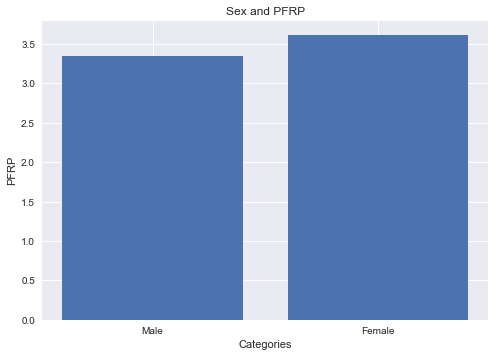

(3.34375, 3.6153846153846154)

In [31]:
# PFRP
male = df.loc[df['Sex'] == 1]['PFRP']
female = df.loc[df['Sex'] == 2]['PFRP']

print(stats.ttest_ind(male, female, equal_var = False))
bars = ['Male', 'Female']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [male.mean(), female.mean()])
plt.title('Sex and PFRP')
plt.xlabel('Categories')
plt.ylabel('PFRP')
plt.xticks(y_pos, bars)
plt.savefig('gender_pfrp.png', dpi = 600)
plt.show()
male.mean(), female.mean()

Ttest_indResult(statistic=1.2428442785357869, pvalue=0.21917292577239458)


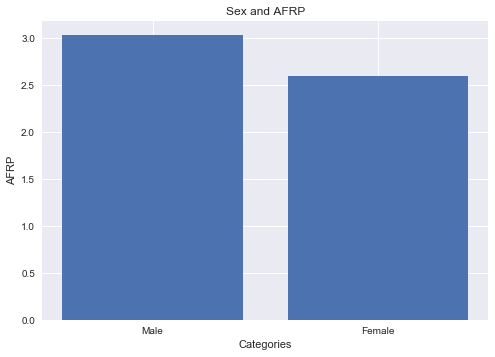

(3.03125, 2.5961538461538463)

In [27]:
# AFRP
male = df.loc[df['Sex'] == 1]['Reward']
female = df.loc[df['Sex'] == 2]['Reward']

print(stats.ttest_ind(male, female, equal_var = False))
bars = ['Male', 'Female']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [male.mean(), female.mean()])
plt.title('Sex and AFRP')
plt.xlabel('Categories')
plt.ylabel('AFRP')
plt.xticks(y_pos, bars)
plt.savefig('gender_afrp.png', dpi = 600)
plt.show()
male.mean(), female.mean()

In [74]:
df['PRP_diff'] = df['PFRP'] - df['Reward']

Ttest_indResult(statistic=-1.765106811910387, pvalue=0.083043257468671139)


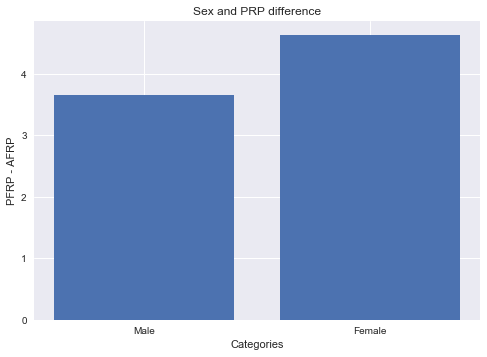

In [76]:
# Difference
male = df.loc[df['Sex'] == 1]['PRP_diff']
female = df.loc[df['Sex'] == 2]['PRP_diff']

print(stats.ttest_ind(male, female, equal_var = False))
bars = ['Male', 'Female']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [male.mean(), female.mean()])
plt.title('Sex and PRP difference')
plt.xlabel('Categories')
plt.ylabel('PFRP - AFRP')
plt.xticks(y_pos, bars)
# plt.savefig('gender_pfrp.png', dpi = 600)
plt.show()

Ttest_indResult(statistic=0.16083522931412725, pvalue=0.8727617838159174)


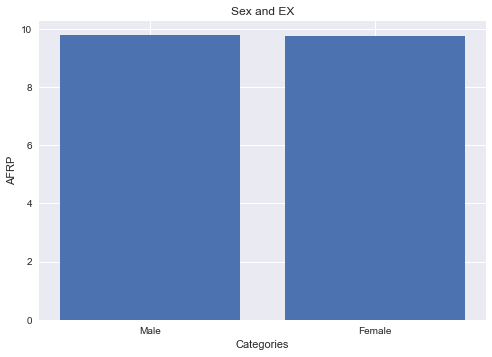

In [13]:
# Extraversion
male = df.loc[df['Sex'] == 1]['EX']
female = df.loc[df['Sex'] == 2]['EX']

print(stats.ttest_ind(male, female, equal_var = False))
bars = ['Male', 'Female']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [male.mean(), female.mean()])
plt.title('Sex and EX')
plt.xlabel('Categories')
plt.ylabel('AFRP')
plt.xticks(y_pos, bars)
# plt.savefig('gender_pfrp.png', dpi = 600)
plt.show()

## Year

('soph junior', Ttest_indResult(statistic=-1.1024375406810945, pvalue=0.27455694469455844))
('junior senior', Ttest_indResult(statistic=0.7315912278873492, pvalue=0.46813938101313468))
('sophomore senior', Ttest_indResult(statistic=-0.31436763634983067, pvalue=0.75473580237866322))


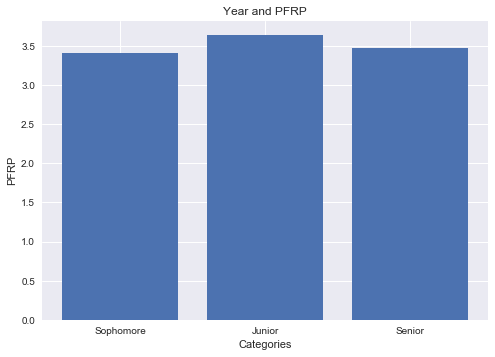

3.41
3.64
3.48


In [34]:
# PFRP
soph = df.loc[df['Year'] == 2]['PFRP']
jun = df.loc[df['Year'] == 3]['PFRP']
sen = df.loc[df['Year'] == 4]['PFRP']

print('soph junior', stats.ttest_ind(soph, jun, equal_var = False))
print('junior senior', stats.ttest_ind(jun, sen, equal_var = False))
print('sophomore senior', stats.ttest_ind(soph, sen, equal_var = False))
bars = ['Sophomore', 'Junior', 'Senior']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [soph.mean(), jun.mean(), sen.mean()])
plt.title('Year and PFRP')
plt.xlabel('Categories')
plt.ylabel('PFRP')
plt.xticks(y_pos, bars)
plt.savefig('year_pfrp.png', dpi = 600)
plt.show()
print(round(soph.mean(), 2))
print(round(jun.mean(), 2))
print(round(sen.mean(), 2))

('soph junior', Ttest_indResult(statistic=0.0, pvalue=1.0))
('junior senior', Ttest_indResult(statistic=-1.3878693086777738, pvalue=0.17339865067004231))
('sophomore senior', Ttest_indResult(statistic=-1.3129044362222384, pvalue=0.19635297225333492))


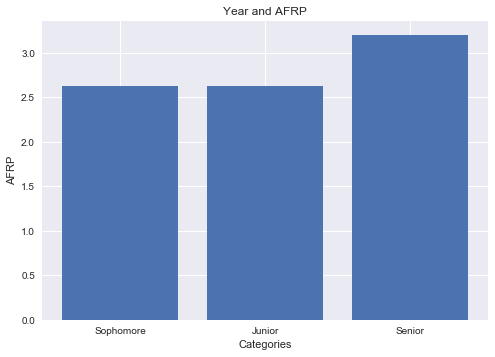

2.63
2.63
3.2


In [26]:
# AFRP
soph = df.loc[df['Year'] == 2]['Reward']
jun = df.loc[df['Year'] == 3]['Reward']
sen = df.loc[df['Year'] == 4]['Reward']

print('soph junior', stats.ttest_ind(soph, jun, equal_var = False))
print('junior senior', stats.ttest_ind(jun, sen, equal_var = False))
print('sophomore senior', stats.ttest_ind(soph, sen, equal_var = False))
bars = ['Sophomore', 'Junior', 'Senior']
y_pos = np.arange(len(bars))
plt.bar(np.arange(len(bars)), [soph.mean(), jun.mean(), sen.mean()])
plt.title('Year and AFRP')
plt.xlabel('Categories')
plt.ylabel('AFRP')
plt.xticks(y_pos, bars)
plt.savefig('year_afrp.png', dpi = 600)
plt.show()
print(round(soph.mean(), 2))
print(round(jun.mean(), 2))
print(round(sen.mean(), 2))

In [114]:
jun.mean()

2.625

In [115]:
soph.mean()

2.625